In [97]:
import os
import pandas as pd
from scipy import stats
import numpy as np

In [98]:
os.listdir('samsung_health_data')

['com.samsung.shealth.sleep.202204171909.csv',
 'com.samsung.shealth.permission.202204171909.csv',
 'com.samsung.health.food_info.202204171909.csv',
 'com.samsung.health.sleep_stage.202204171909.csv',
 'com.samsung.shealth.food_frequent.202204171909.csv',
 'com.samsung.health.weight.202204171909.csv',
 'com.samsung.shealth.stress.histogram.202204171909.csv',
 'com.samsung.health.floors_climbed.202204171909.csv',
 'com.samsung.shealth.sleep_combined.202204171909.csv',
 'com.samsung.shealth.best_records.202204171909.csv',
 'com.samsung.health.height.202204171909.csv',
 'com.samsung.shealth.tracker.oxygen_saturation.202204171909.csv',
 'com.samsung.shealth.stress.202204171909.csv',
 'com.samsung.shealth.tracker.pedometer_step_count.202204171909.csv',
 'com.samsung.shealth.report.202204171909.csv',
 'com.samsung.shealth.preferences.202204171909.csv',
 'com.samsung.shealth.step_daily_trend.202204171909.csv',
 'com.samsung.shealth.exercise.202204171909.csv',
 'com.samsung.health.user_profile

In [99]:
sleep_data = os.path.join('samsung_health_data', 'com.samsung.health.sleep_stage.202204171909.csv')

In [100]:
df = pd.read_csv(sleep_data, delimiter=',', index_col='start_time')

In [101]:
df.index = pd.DatetimeIndex(df.index)

<AxesSubplot:xlabel='start_time'>

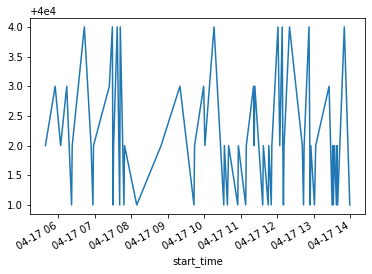

In [102]:
df['stage'].plot()

In [103]:
stages = df.sort_values(by='start_time')['stage']

In [104]:
stages

start_time
2022-04-17 05:39:00    40002
2022-04-17 05:55:00    40003
2022-04-17 06:04:00    40002
2022-04-17 06:14:00    40003
2022-04-17 06:22:00    40001
                       ...  
2022-04-17 13:37:00    40001
2022-04-17 13:38:00    40002
2022-04-17 13:39:00    40001
2022-04-17 13:50:00    40004
2022-04-17 13:59:00    40001
Name: stage, Length: 69, dtype: int64

<AxesSubplot:xlabel='start_time'>

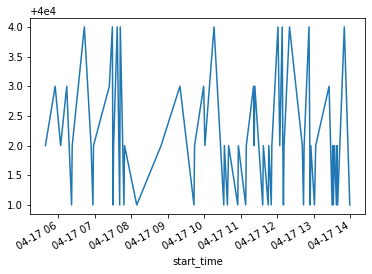

In [105]:
stages.plot()

In [106]:
stages = stages.resample('1T').ffill()

<AxesSubplot:xlabel='start_time'>

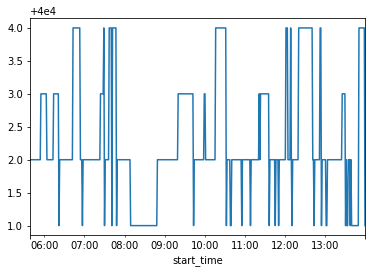

In [122]:
stages.plot()

<AxesSubplot:xlabel='start_time'>

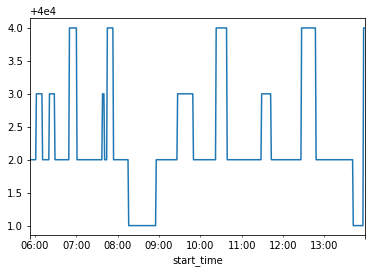

In [120]:
n = 15
smoothed = stages.rolling(n).apply(lambda x: np.median(x)).iloc[n-1:]
smoothed.plot()

<AxesSubplot:xlabel='start_time'>

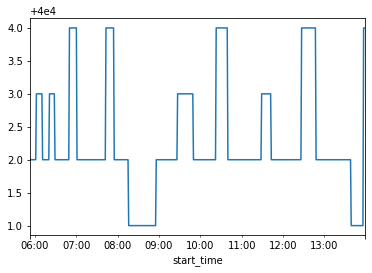

In [171]:
n = 15
smoothed = stages.rolling(n).apply(lambda x: stats.mode(x)[0]).iloc[n-1:]
smoothed.plot()

In [180]:
class WakerUpper:
    def __init__(self):
        self.sleep_time = pd.Timedelta('0T')
        self.last_timestamp = None
        self.rolling_window = []
        
    def get_new_data_point(self, time, cycle):
        if not self.last_timestamp:
            self.last_timestamp = time
        self.sleep_time += (time - self.last_timestamp)
        self.last_timestamp = time
        
        if len(self.rolling_window) < 15:
            self.rolling_window.append(cycle)
        else:
            self.rolling_window = self.rolling_window[1:] + [cycle]
        
        wake = self.wake_up()
        if wake:
            print("WAKE UP!")
            return True
        return False
    
    def wake_up(self):
        if stats.mode(self.rolling_window)[0][0] == 40001 and self.sleep_time > pd.Timedelta('7H'):
            return True
        else:
            return False

In [194]:
wake = WakerUpper()
for time, cycle in smoothed.iteritems():
    if wake.get_new_data_point(time, cycle):
        print(f'{wake.sleep_time:%m}')
        break

WAKE UP!


TypeError: unsupported format string passed to Timedelta.__format__

In [184]:
next(smoothed.iteritems())[0]

Timestamp('2022-04-17 05:53:00', freq='T')